Importing Necessary Tools

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Data Time! Importing our training crew from 'Training.csv'

In [2]:
df = pd.read_csv("Training.csv")

Sneak peek! Grabbing a handful of random data points like picking winning lottery numbers (except it's actually science) to look how the data is..

In [3]:
df.sample(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
1021,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hepatitis B,NaN
3561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
4526,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chicken pox,NaN
989,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chicken pox,NaN
2161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Migraine,NaN


Spot the cheaters! Counting missing values with a detective's eye

In [4]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

Eviction notice! Dropping the unnecessary column 'Unnamed: 133'

In [5]:
df.drop(columns = ["Unnamed: 133"], inplace = True, axis = 1)

Translating the Diagnosis! Encoding our 'prognosis' category with a label encoder (think secret code for medical terms)
Converting the data into numbers (ML algorithm: tQ sir)

In [6]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

Dividing the Booty: Splitting data into training (X_train, y_train) and testing (X_test, y_test) sets like 
pirates dividing their treasure (but hopefully more fair) 

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Choosing Our Weapons: Initializing SVC, GaussianNB, and Random Forest models (think picking superheroes for classification task) 

In [8]:
svc_model = SVC()
gau_nb  = GaussianNB()
random_forest = RandomForestClassifier(random_state = 42)

Putting the SVC to Work! Training the model on training data (X_train, y_train) and assessing its performance on test data (X_test, y_test). 

Confusion Matrix - like a detective's board connecting predictions to reality (hopefully with more 'correctly classified' than 'wrong guesses').  

SVC Accuracy Score : 1.0


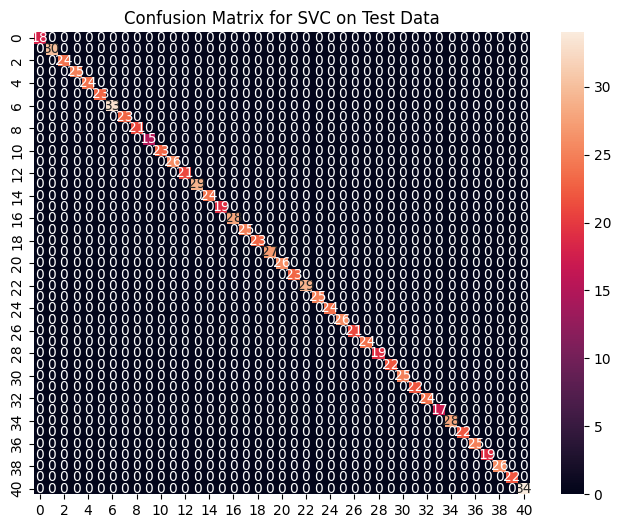

In [9]:
svc_model.fit(X_train, y_train)
y_hat = svc_model.predict(X_test)
print(f"SVC Accuracy Score : {accuracy_score(y_test, y_hat)}")
cfn_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8,6))
sns.heatmap(cfn_matrix, annot=True)
plt.title("Confusion Matrix for SVC on Test Data")
plt.show()

To SVC: 
From Gaussian NB:

msg: I can also do these silly predictions...! See my results dude...!

Gaussian NB Accuracy Score : 1.0


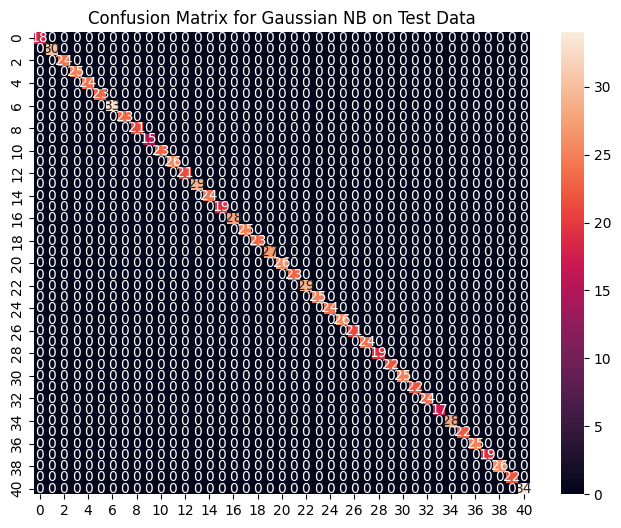

In [10]:
gau_nb.fit(X_train, y_train)
y_hat = gau_nb.predict(X_test)
print(f"Gaussian NB Accuracy Score : {accuracy_score(y_test, y_hat)}")
cfn_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8,6))
sns.heatmap(cfn_matrix, annot=True)
plt.title("Confusion Matrix for Gaussian NB on Test Data")
plt.show()

To: SVC and Gaussian NB
From : Random Forest

msg: I can do this all day, you silly fellows...! See my results dudes

Random Forest Accuracy Score : 1.0


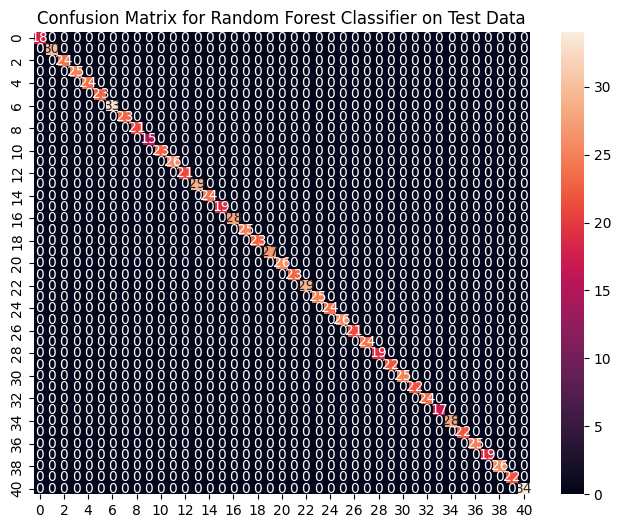

In [11]:
random_forest.fit(X_train, y_train)
y_hat = random_forest.predict(X_test)
print(f"Random Forest Accuracy Score : {accuracy_score(y_test, y_hat)}")
cfn_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8,6))
sns.heatmap(cfn_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Feature Engineering: Preprocessing symbol list (X.columns) into a feature vector.(Yeah, It sounds like professional)

In [28]:
trained_sym_list = X.columns.values
def preprocess(sym_list):
    sym_list_template = []
    for x in range(132):
        sym_list_template.append(0)
    sym_list_transform = []
    for sym in sym_list:
        sym = sym.lower()
        sym = sym.replace(" ", "_")
        sym_list_transform.append(sym)
    sym_list_vec = sym_list_template
    for index, value in enumerate(trained_sym_list):
        if value in sym_list_transform:
            sym_list_vec[index] = 1
    return sym_list_vec

Predicts class label for a list of symbols using preprocessed feature vector and trained SVC model

In [29]:
def predict1(sym_list):
    sym_list_vec = preprocess(sym_list)
    return encoder.classes_[svc_model.predict([sym_list_vec])[0]]

Predicts class label for a list of symbols using preprocessed feature vector and trained Gaussian NB

In [30]:
def predict2(sym_list):
    sym_list_vec = preprocess(sym_list)
    return encoder.classes_[gau_nb.predict([sym_list_vec])[0]]

Predicts class label for a list of symbols using preprocessed feature vector and trained Random Forest model

In [31]:
def predict3(sym_list):
    sym_list_vec = preprocess(sym_list)
    return encoder.classes_[random_forest.predict([sym_list_vec])[0]]

"""Not putting all our eggs in one basket! This function throws three models (SVC, GaussianNB, Random Forest) 
  at the problem (symbols) and picks the most frequent prediction (think majority wins the detective case!)."""

In [52]:
def result(sym_list):
    trained_sym_list = X.columns.values
    def preprocess(sym_list):
        sym_list_template = []
        for x in range(132):
            sym_list_template.append(0)
        sym_list_transform = []
        for sym in sym_list:
            sym = sym.lower()
            sym = sym.replace(" ", "_")
            sym_list_transform.append(sym)
        sym_list_vec = sym_list_template
        for index, value in enumerate(trained_sym_list):
            if value in sym_list_transform:
                sym_list_vec[index] = 1
        return sym_list_vec
    def predict1(sym_list):
        sym_list_vec = preprocess(sym_list)
        return encoder.classes_[svc_model.predict([sym_list_vec])[0]]
    def predict2(sym_list):
        sym_list_vec = preprocess(sym_list)
        return encoder.classes_[gau_nb.predict([sym_list_vec])[0]]
    def predict3(sym_list):
        sym_list_vec = preprocess(sym_list)
        return encoder.classes_[random_forest.predict([sym_list_vec])[0]]
    from statistics import mode
    return "Disease is: " + mode([predict1(new_syms), predict2(new_syms), predict3(new_syms)])

In [53]:
disease_symptoms = ["Conjuctivis", "Stomach Pain", "Acidity", "Joint pain", "shivering", "itching", "Headache", "Chest pain"]

In [54]:
result(disease_symptoms)

'Disease is: GERD'

In [ ]:
#Finished...!

IF you want to take the symptoms from the user,
# Case Cracked? Let's gather some clues! (Enter a list of symbols separated by spaces)
user_symbols = input().split()

# The investigation begins! We'll pass these clues (user_symbols) to our crack team of models (result function).
predicted_class = result(user_symbols)

# Presenting the verdict! The most likely culprit based on the models' analysis is: {predicted_class}
print(f"Presenting the verdict! The most likely culprit based on the models' analysis is: {predicted_class}")